In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv(r'tested.csv')

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [27]:
data.shape


(418, 12)

## Preprocessing of Data

In [30]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [66]:
data['Fare'].fillna(data['Fare'].median(),inplace=True)

In [90]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [96]:
data.duplicated().sum()

0

In [98]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##### Dropping irrelevant Columns

In [127]:
data.drop(['PassengerId'], axis=1, inplace=True)
data.drop(['Name'], axis=1, inplace=True)
data.drop(['Ticket'], axis=1, inplace=True)


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Cabin     418 non-null    object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [109]:
data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [119]:
data.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

##### Distribution 

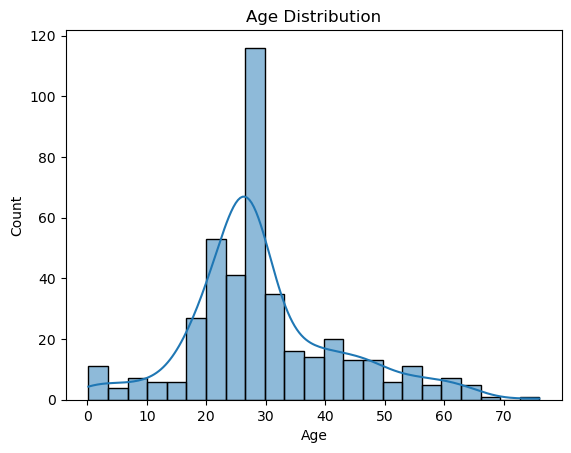

In [133]:
# Age Distribution
sns.histplot(data['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

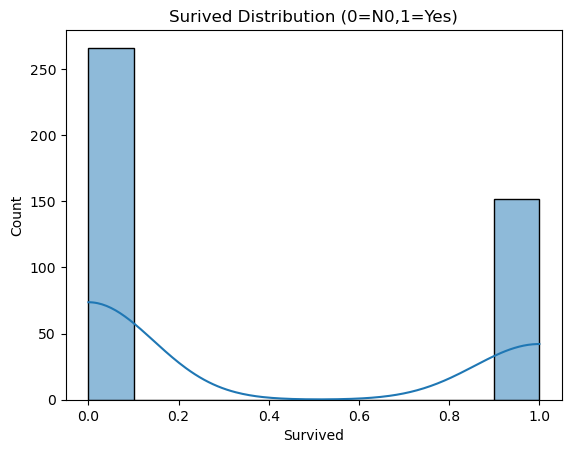

In [177]:
sns.histplot(data['Survived'],kde=True)
plt.title('Surived Distribution (0=N0,1=Yes)')
plt.show()

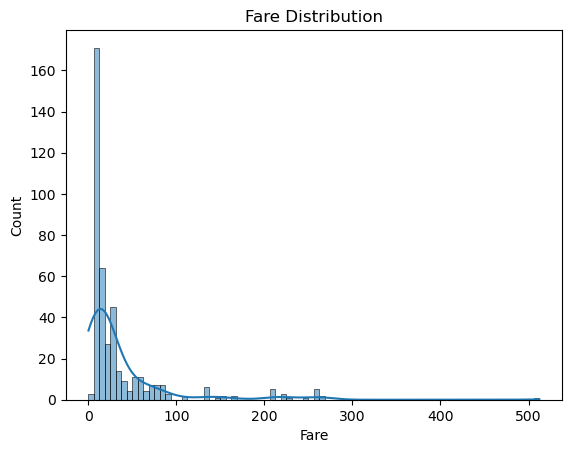

In [181]:
sns.histplot(data['Fare'],kde=True)
plt.title('Fare Distribution')
plt.show()

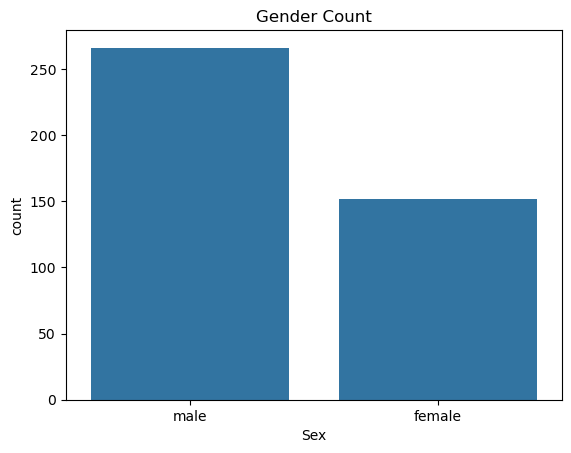

In [135]:
sns.countplot(x='Sex',data=data)
plt.title('Gender Count')
plt.show()

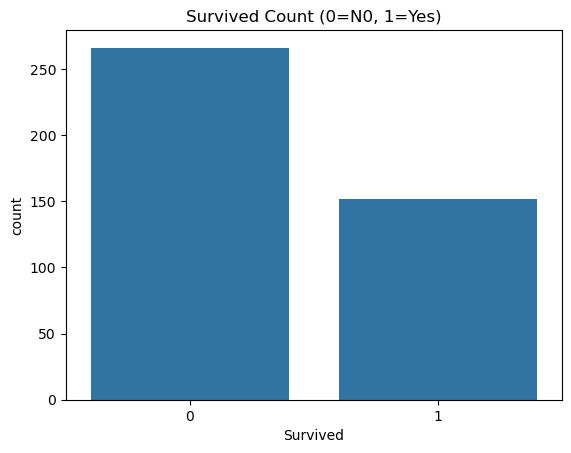

In [139]:
sns.countplot(x='Survived',data=data)
plt.title('Survived Count (0=N0, 1=Yes)')
plt.show()

#### Bivariate Visualizations

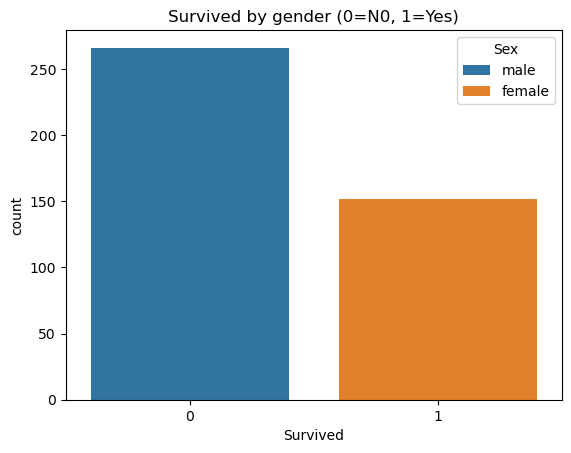

In [145]:
# now compare Sex vs Survived
sns.countplot(x='Survived',hue='Sex',data=data)
plt.title("Survived by gender (0=N0, 1=Yes)")
plt.show()

In [151]:
survived_rate=data.groupby('Pclass')['Survived'].mean().reset_index()


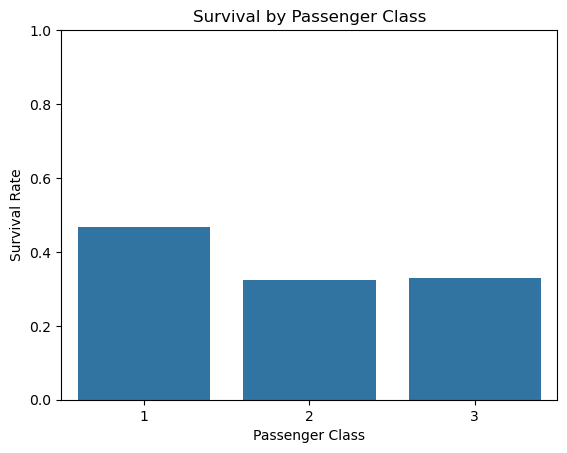

In [165]:
# Now Survived vs Pclass
sns.barplot(x='Pclass',y='Survived',data=survived_rate)
plt.title("Survival by Passenger Class")
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0,1)
plt.show()

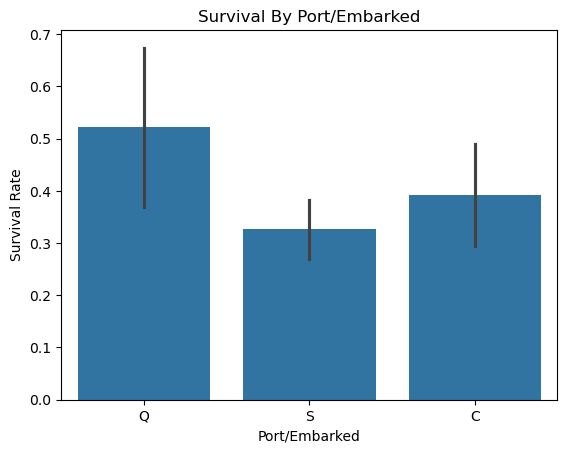

In [205]:
sns.barplot(x='Embarked',y='Survived',data=data)
plt.title('Survival By Port/Embarked')
plt.ylabel('Survival Rate')
plt.xlabel('Port/Embarked')
plt.show()

In [214]:
# Now Converting categorical data to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked']=data['Embarked'].map({'Q':0,'S':1,"C":2})

In [218]:
data.rename(columns={'Embarked': "Port"},inplace=True)

In [222]:
data.drop('Cabin',axis=1,inplace=True)

In [232]:
correleation=data.corr()
print(correleation)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.108615  1.000000  0.008035  0.099943  0.159120   
Pclass   -0.108615  1.000000 -0.108615 -0.467853  0.001087  0.018721   
Sex       1.000000 -0.108615  1.000000  0.008035  0.099943  0.159120   
Age       0.008035 -0.467853  0.008035  1.000000 -0.071197 -0.043731   
SibSp     0.099943  0.001087  0.099943 -0.071197  1.000000  0.306895   
Parch     0.159120  0.018721  0.159120 -0.043731  0.306895  1.000000   
Fare      0.192036 -0.577313  0.192036  0.342357  0.171912  0.230325   
Port     -0.037432 -0.372344 -0.037432  0.142423  0.041221  0.067474   

              Fare      Port  
Survived  0.192036 -0.037432  
Pclass   -0.577313 -0.372344  
Sex       0.192036 -0.037432  
Age       0.342357  0.142423  
SibSp     0.171912  0.041221  
Parch     0.230325  0.067474  
Fare      1.000000  0.315285  
Port      0.315285  1.000000  


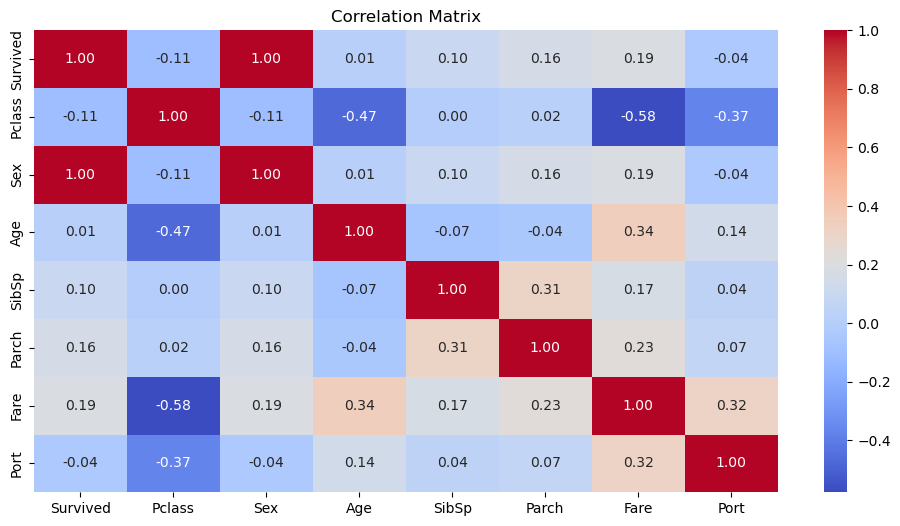

In [234]:
plt.figure(figsize=(12,6))
sns.heatmap(correleation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### Crosstab

In [241]:
print(pd.crosstab(data['Pclass'], data['Survived'], normalize='index'))
print(pd.crosstab(data['Sex'], data['Survived'], normalize='index'))
print(pd.crosstab(data['Port'],data['Survived'],normalize='index'))

Survived         0         1
Pclass                      
1         0.532710  0.467290
2         0.677419  0.322581
3         0.669725  0.330275
Survived    0    1
Sex               
0         1.0  0.0
1         0.0  1.0
Survived         0         1
Port                        
0         0.478261  0.521739
1         0.674074  0.325926
2         0.607843  0.392157


In [251]:
data=data.astype(int)

#### Now Applying ML models

In [256]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [266]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


### LogisticRegression Model

In [280]:
y_pred_test_lr=model_lr.predict(X_test)

In [286]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [288]:
# Model Evalution
print("Accuarcy Score:",accuracy_score(y_test,y_pred_test_lr))
print("Confussion Matrix: \n",confusion_matrix(y_test,y_pred_test_lr))
print('Classification Report',classification_report(y_test,y_pred_test_lr))

Accuarcy Score: 1.0
Confussion Matrix: 
 [[50  0]
 [ 0 34]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### DecisionTreeClassifier

In [291]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [293]:
y_pred_test_dt=model_dt.predict(X_test)

In [295]:
# Model Evalution
print("Accuarcy Score:",accuracy_score(y_test,y_pred_test_dt))
print("Confussion Matrix: \n",confusion_matrix(y_test,y_pred_test_dt))
print('Classification Report',classification_report(y_test,y_pred_test_dt))

Accuarcy Score: 1.0
Confussion Matrix: 
 [[50  0]
 [ 0 34]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



##### Decession Tree Classification Model Graph

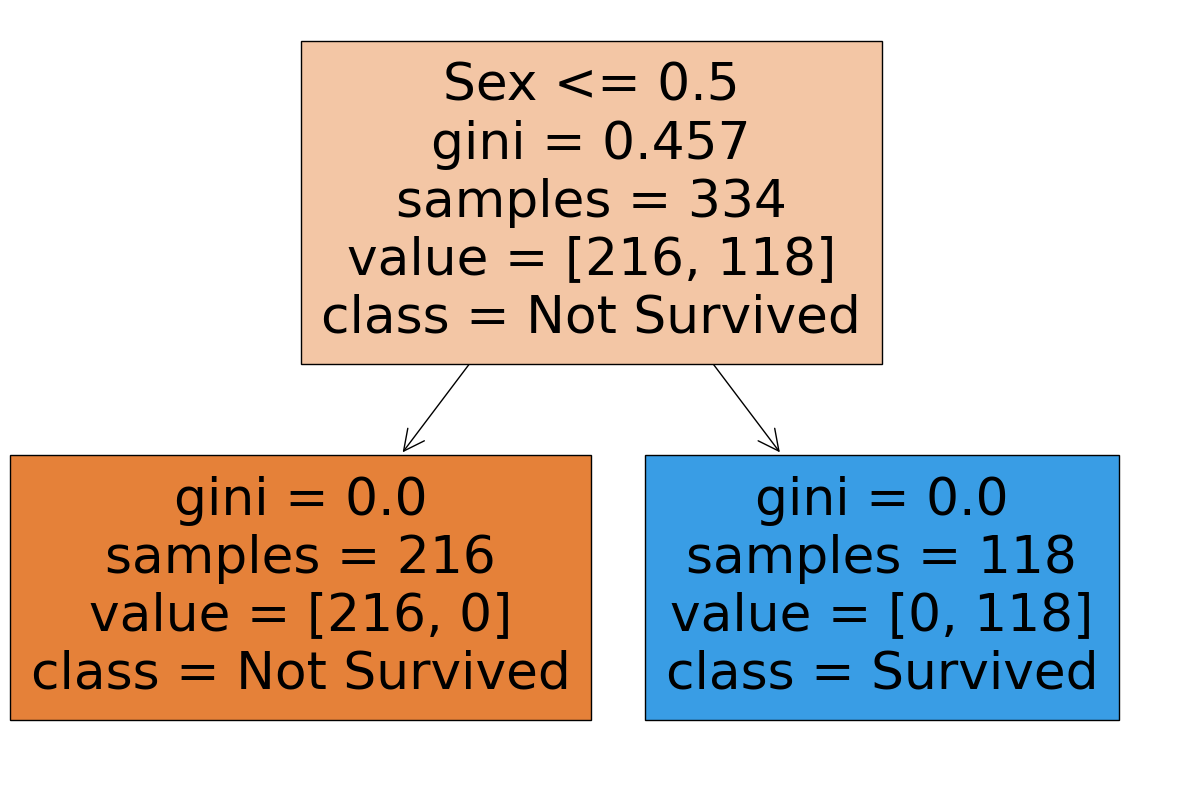

In [299]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plt.title("Decession Tree Classification Model Graph")
plot_tree(model_dt,filled=True,feature_names=X.columns,class_names=['Not Survived','Survived'])
plt.show()


### RandomForestClassifier

In [301]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [303]:
y_pred_test_rf=model_rf.predict(X_test)

In [305]:
# Model Evalution
print("Accuarcy Score:",accuracy_score(y_test,y_pred_test_rf))
print("Confussion Matrix: \n",confusion_matrix(y_test,y_pred_test_rf))
print('Classification Report',classification_report(y_test,y_pred_test_rf))

Accuarcy Score: 1.0
Confussion Matrix: 
 [[50  0]
 [ 0 34]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Deploying a model

In [342]:
import joblib
joblib.dump(model_dt,'titanic_model.pkl')

['titanic_model.pkl']

#### Again Load modle and Inputs for users

In [344]:
import streamlit as st
# load trained model
model=joblib.load('titanic_model.pkl')

st.title("Tiatanic Survival Prediction")

# input features for users to inter data
pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Number of Siblings/Spouses aboard (SibSp)", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of Parents/Children aboard (Parch)", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, max_value=500.0, value=32.0)
port = st.selectbox("Port of Embarkation", ['S', 'C', 'Q'])

# Convert inputs to model-ready format
sex_num = 1 if sex == 'male' else 0

# Convert Port to numeric (adjust based on your encoding)
port_map = {'S': 0, 'C': 1, 'Q': 2}
port_num = port_map[port]

# Create DataFrame for prediction
input_df = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex_num],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Port': [port_num]
})

if st.button("Predict Survival"):
    prediction = model.predict(input_df)
    if prediction[0] == 1:
        st.success("🎉 The passenger is predicted to Survive!")
    else:
        st.error("☹️ The passenger is predicted NOT to Survive.")



In [325]:
pip install streamlit

### Note
- Make app.py and Tiatanic Model .pkl file Location same
-  Enter File location on Cmd and enter
-   Enter streamlit run app.py
- so finally your app run on browser and with inout values search for survived or not 

